In [1]:
import numpy as np
import pandas as pd
from plotting import plot_tree, plot_2D_labeled_clusters, plot_multiple_2D_labeled_clusters
from plotting import plot_2D_labeled_clusters_with_centers, plot_multiple_2D_labeled_clusters_with_centers

data_2D_datapath = './../data/dane_2D_'

data_2D = {}
data_2D_labels = {}

for i in range(1, 9):
    data_2D[i] = pd.read_csv(data_2D_datapath + str(i) + '.txt', header=None, sep=',', dtype=np.float64)
    data_2D_labels[i] = data_2D[i].iloc[:, -1]
    data_2D[i].drop(columns=[2], inplace=True)
    
print(data_2D[2].head())

print(data_2D_labels[2].head())

       0      1
0  26.75  22.15
1  29.80  22.15
2  31.55  21.10
3  27.70  20.85
4  29.90  19.95
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 2, dtype: float64


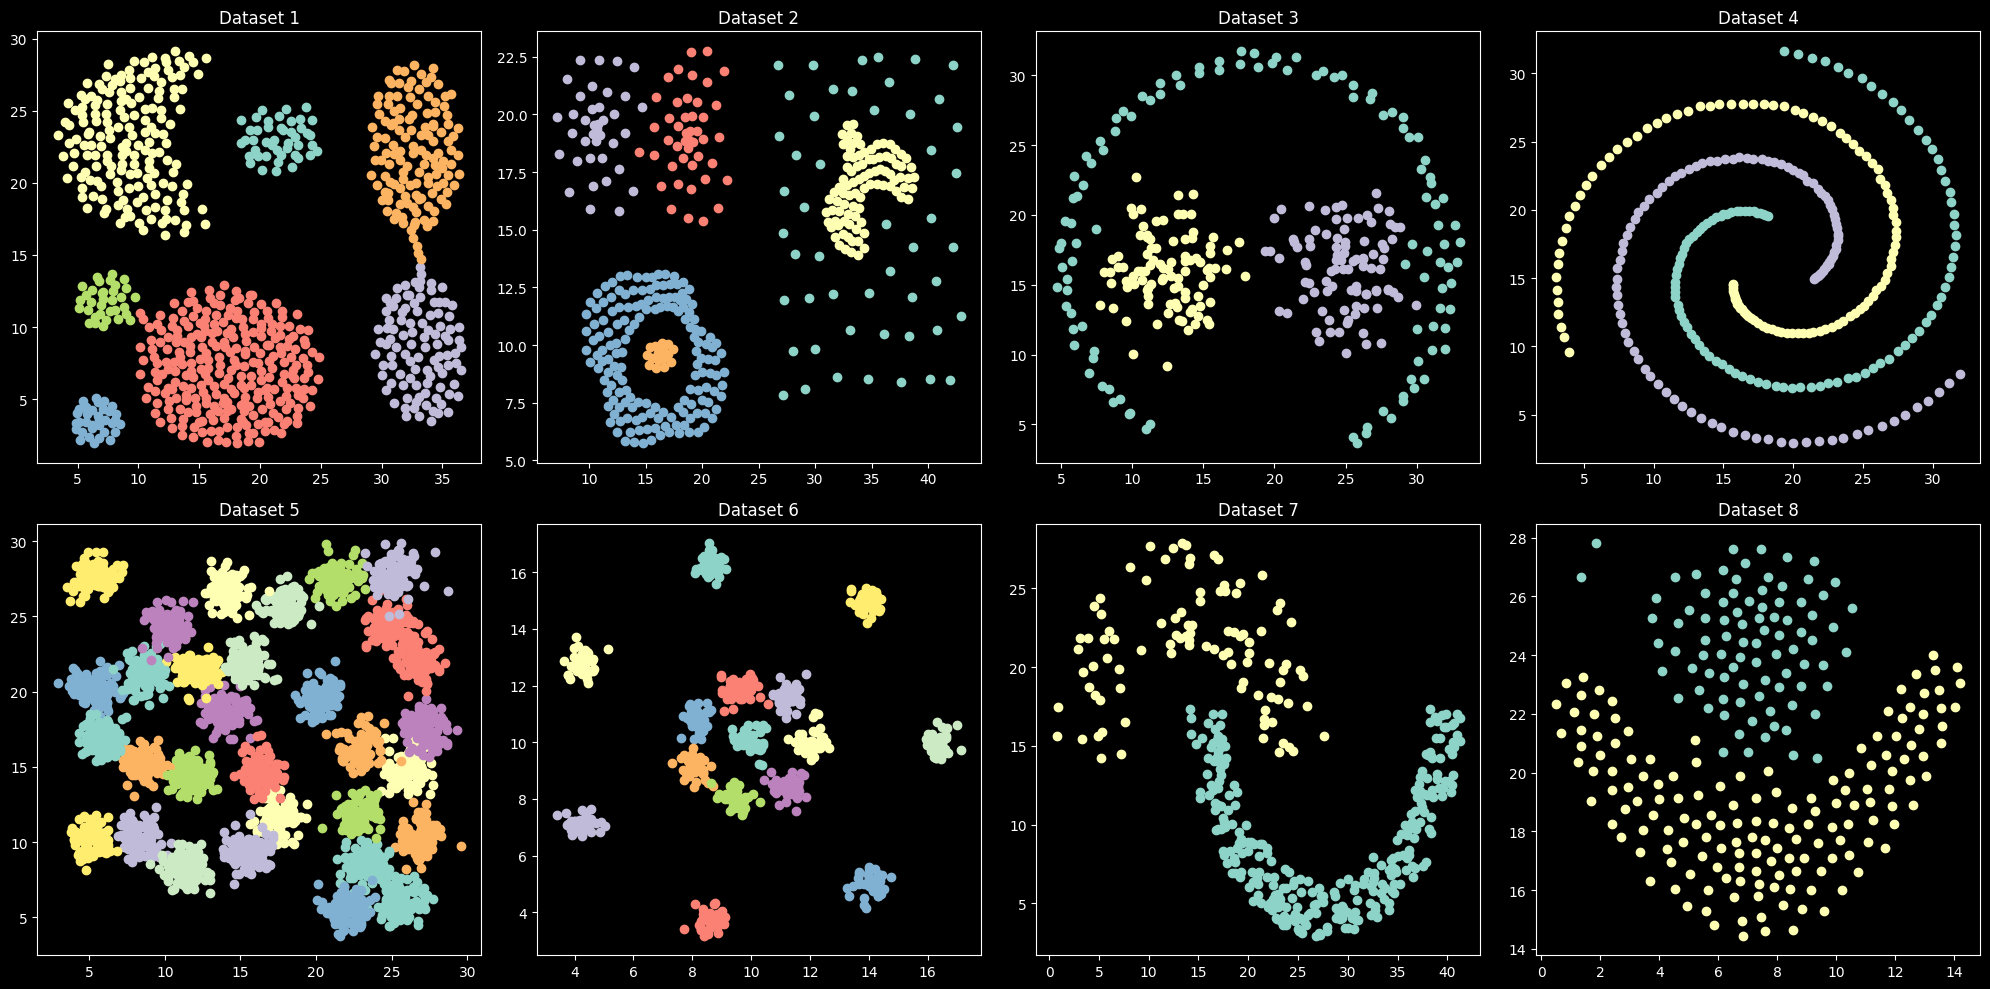

In [2]:
plot_multiple_2D_labeled_clusters(list(data_2D.values()), list(data_2D_labels.values()))

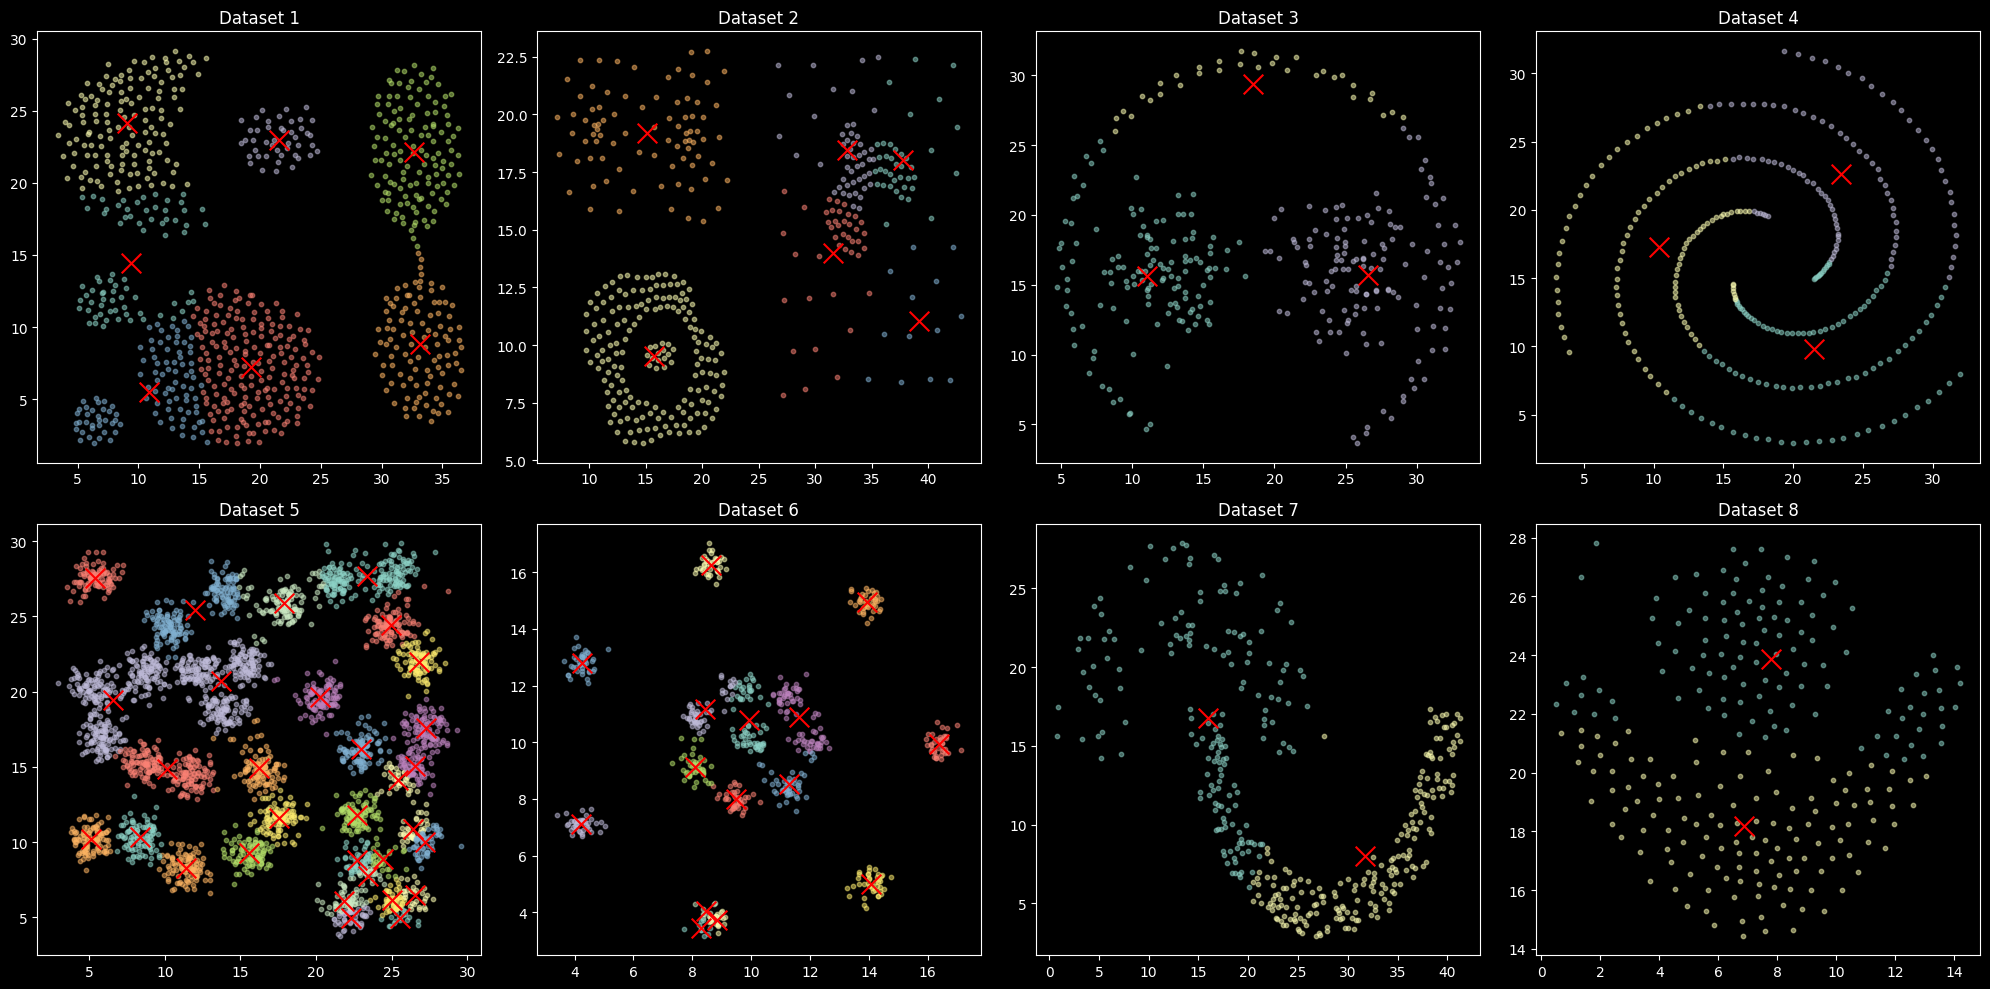

In [25]:
from kmeans import kmeans, nkmeans, kmeanspp, nkmeanspp

centers = {}
labels = {}
for i in range(1, 9):
    n_labels = len(data_2D_labels[i].unique())
    cnts, lbls = kmeans(np.array(data_2D[i]), n_labels)
    centers[i] = cnts
    labels[i] = lbls

plot_multiple_2D_labeled_clusters_with_centers(list(data_2D.values()), list(labels.values()), list(centers.values()))

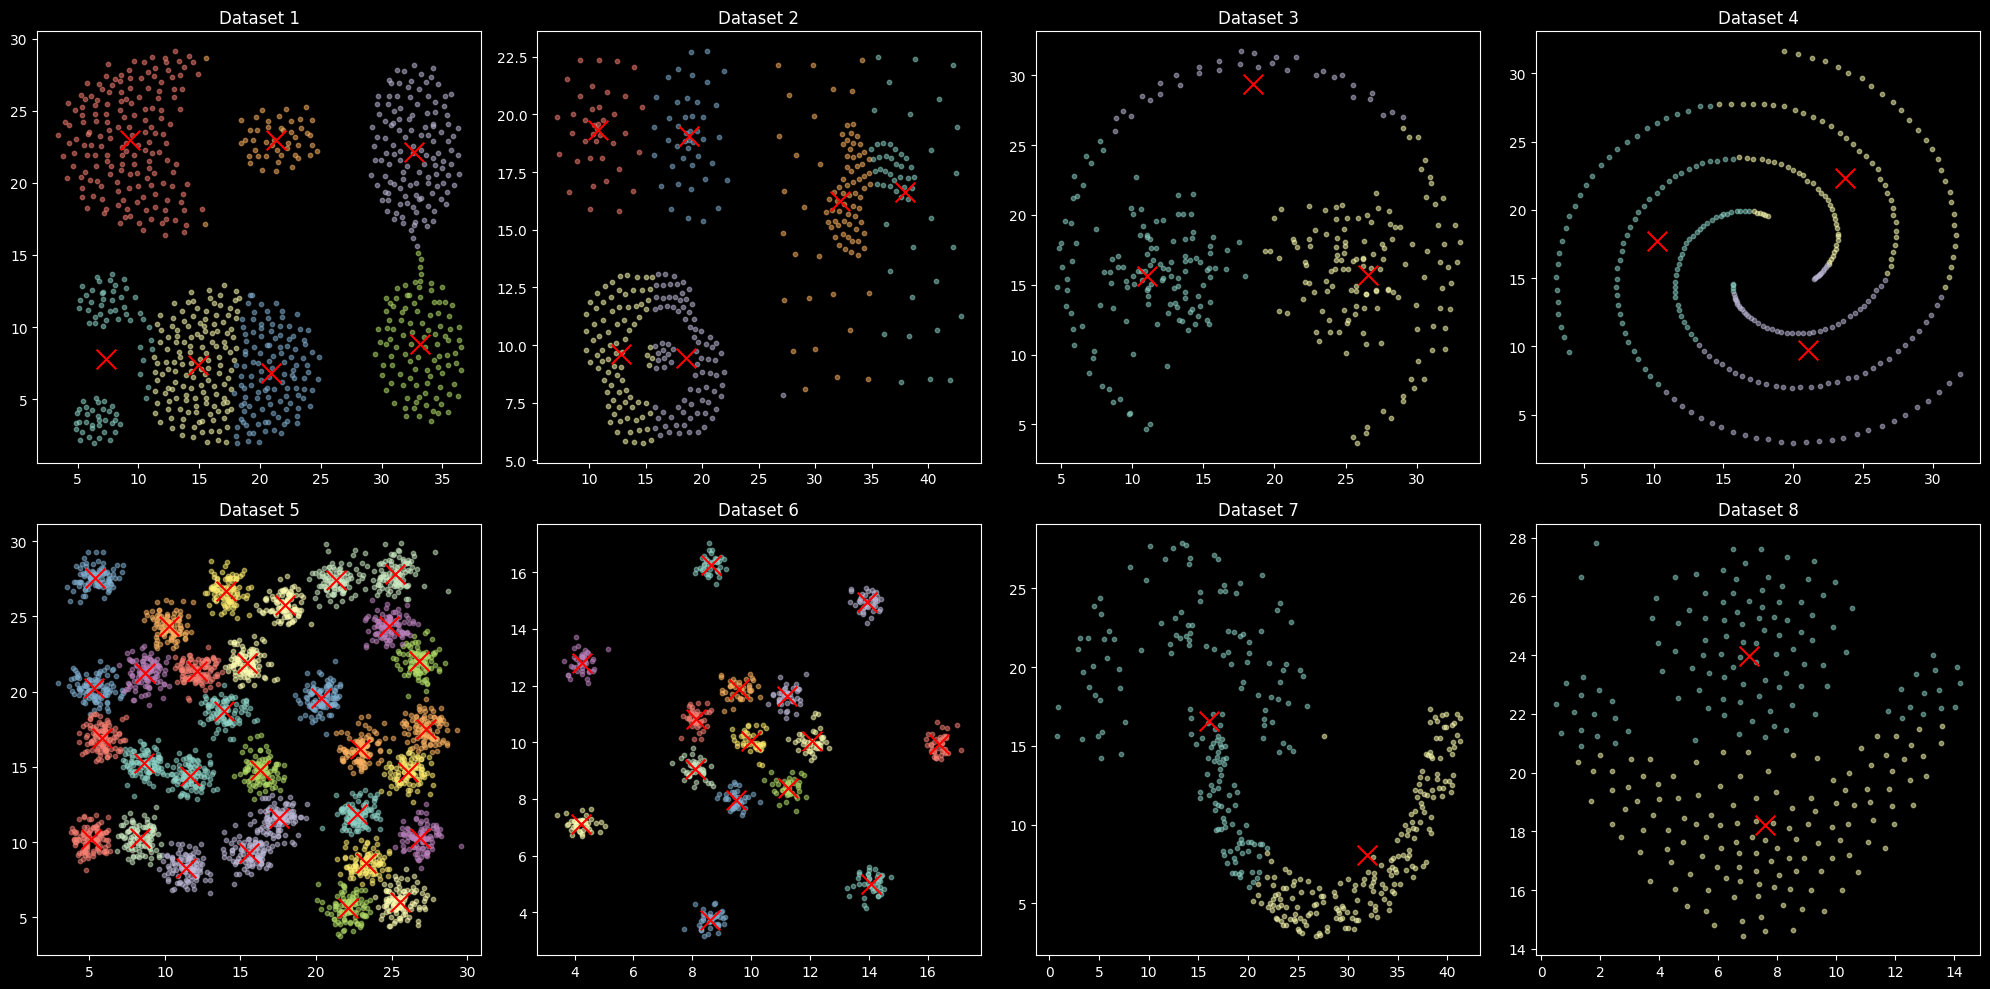

In [26]:
centers = {}
labels = {}
for i in range(1, 9):
    n_labels = len(data_2D_labels[i].unique())
    cnts, lbls = nkmeanspp(np.array(data_2D[i]), n_labels)
    centers[i] = cnts
    labels[i] = lbls
    
plot_multiple_2D_labeled_clusters_with_centers(list(data_2D.values()), list(labels.values()), list(centers.values()))

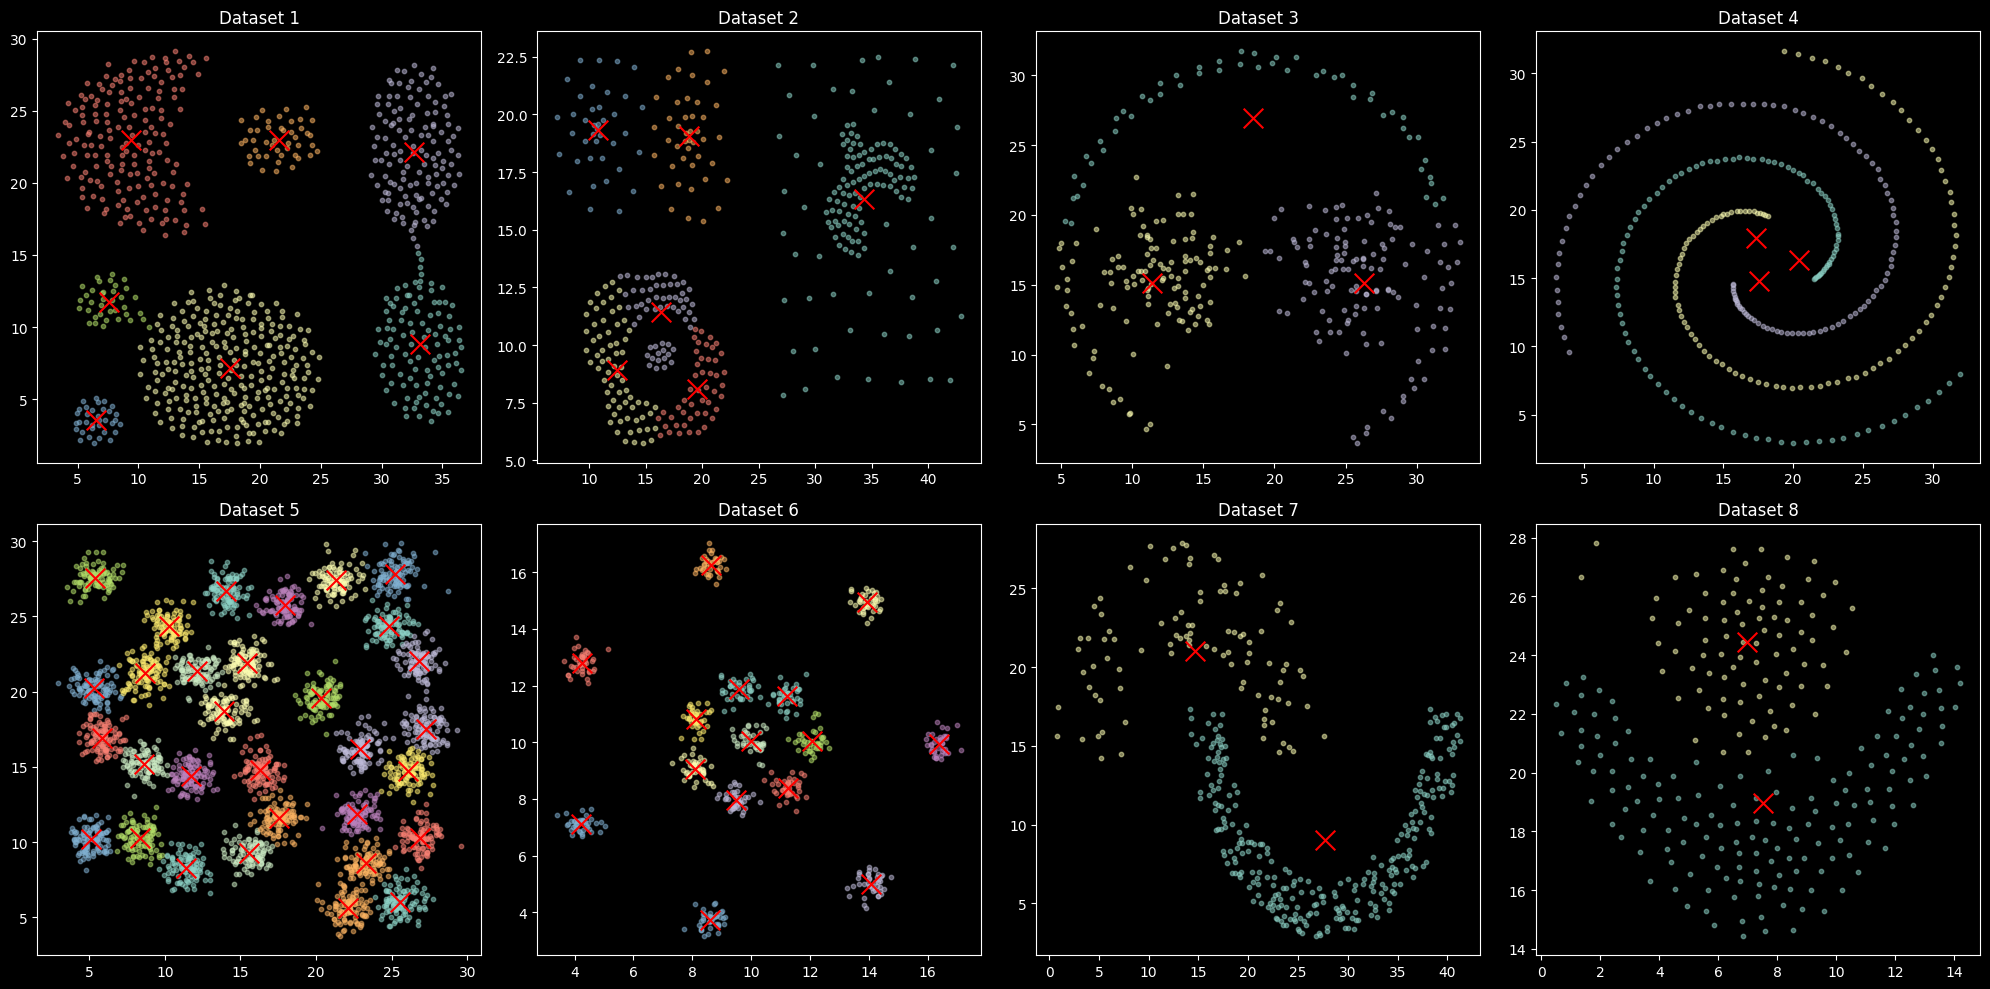

In [23]:
from spectral import spectral_clustering

centers = {}
labels = {}

for i in range(1, 9):
    n_labels = len(data_2D_labels[i].unique())
    cnts, lbls = spectral_clustering(np.array(data_2D[i]), n_labels)
    # calculate centers based on labels
    centers[i] = np.zeros((n_labels, 2))
    labels[i] = lbls
    for j in range(n_labels):
        centers[i][j] = np.mean(data_2D[i].iloc[lbls == j], axis=0)
    
plot_multiple_2D_labeled_clusters_with_centers(list(data_2D.values()), list(labels.values()), list(centers.values()))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

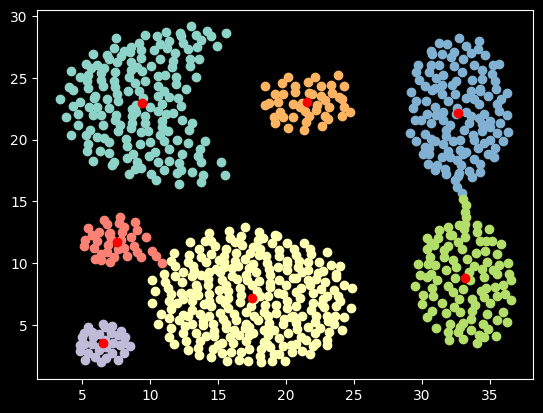

In [21]:
n_labels = len(data_2D_labels[1].unique())
cnts, lbls = spectral_clustering(np.array(data_2D[1]), n_labels)
# calculate centers based on labels
centers = np.zeros((n_labels, 2))
for j in range(n_labels):
    x_label = data_2D[1].iloc[lbls == j]
    # print(x_label)
    centers[j] = np.mean(np.array(x_label), axis=0)
    
print(lbls)

# plot the data colored by labels

plot_2D_labeled_clusters_with_centers(data_2D[1], lbls, centers)

In [35]:
import matplotlib.pyplot as plt

centers = {}
labels = {}

for i in range(1, 9):
    n_labels = len(data_2D_labels[i].unique())
    cnts, lbls = spectral_clustering(np.array(data_2D[i]), n_labels)
    # calculate centers based on labels
    centers[i] = np.zeros((n_labels, 2))
    labels[i] = lbls
    for j in range(n_labels):
        centers[i][j] = np.mean(data_2D[i].iloc[lbls == j], axis=0)


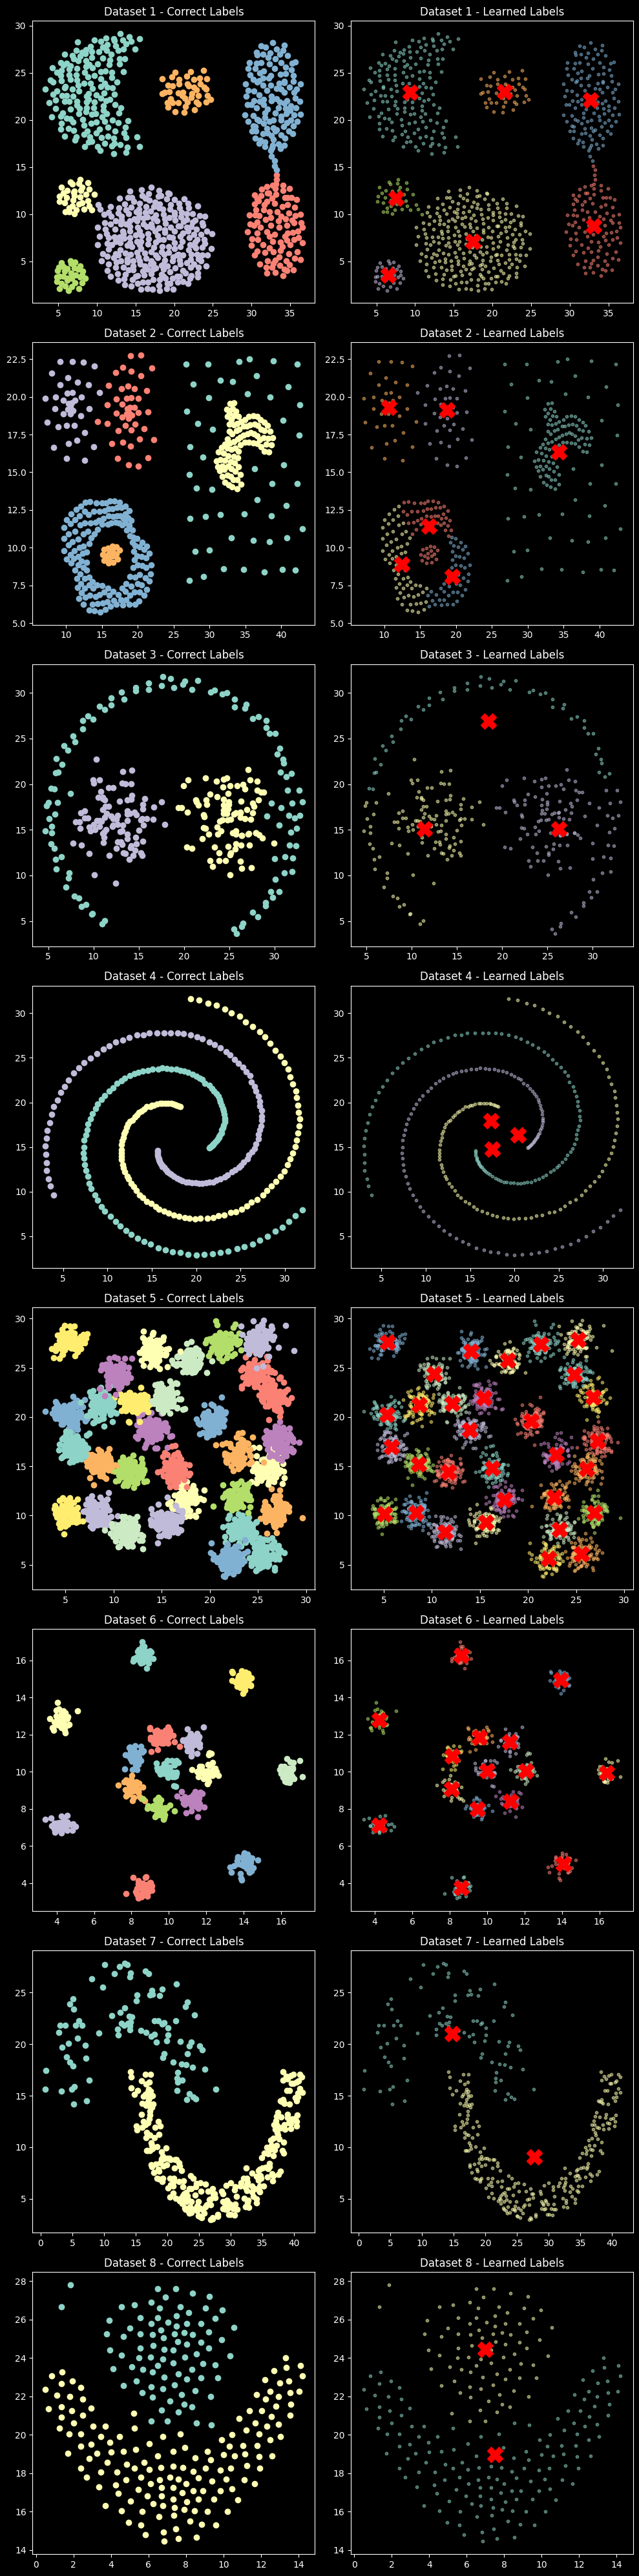

In [36]:
fig, axs = plt.subplots(8, 2, figsize=(10, 40))

for i in range(1, 9):
    row = i-1

    unique_labels = data_2D_labels[i].unique()
    for label in unique_labels:
        data_label = data_2D[i][data_2D_labels[i] == label]
        axs[row, 0].scatter(data_label[0], data_label[1])
    axs[row, 0].set_title(f'Dataset {i} - Correct Labels')
    
    unique_labels_learned = np.unique(labels[i])
    for label in unique_labels_learned:
        data_label = data_2D[i][labels[i] == label]
        axs[row, 1].scatter(data_label[0], data_label[1], alpha=0.5, s=10)
    axs[row, 1].scatter(centers[i][:, 0], centers[i][:, 1], s=300, c='red', marker='X')
    axs[row, 1].set_title(f'Dataset {i} - Learned Labels')

plt.tight_layout()
plt.show()

In [40]:
from hierarhical import hierarchical_lance_williams
import time

padres = {}

# measure the time it takes to run the hierarchical clustering algorithm

for i in range(1, 9):
    start = time.time()
    _, padre = hierarchical_lance_williams(np.array(data_2D[i]), 1)
    padres[i] = padre
    end = time.time()
    print(f"done {i} - time: {end-start}, N = {len(data_2D[i])}")

done 1 - time: 13.972739219665527, N = 788
done 2 - time: 1.8524212837219238, N = 399
done 3 - time: 0.7640187740325928, N = 300
done 4 - time: 0.8662786483764648, N = 312
done 5 - time: 856.1833713054657, N = 3100
done 6 - time: 6.596197843551636, N = 600
done 7 - time: 1.6369681358337402, N = 373
done 8 - time: 0.43592405319213867, N = 240


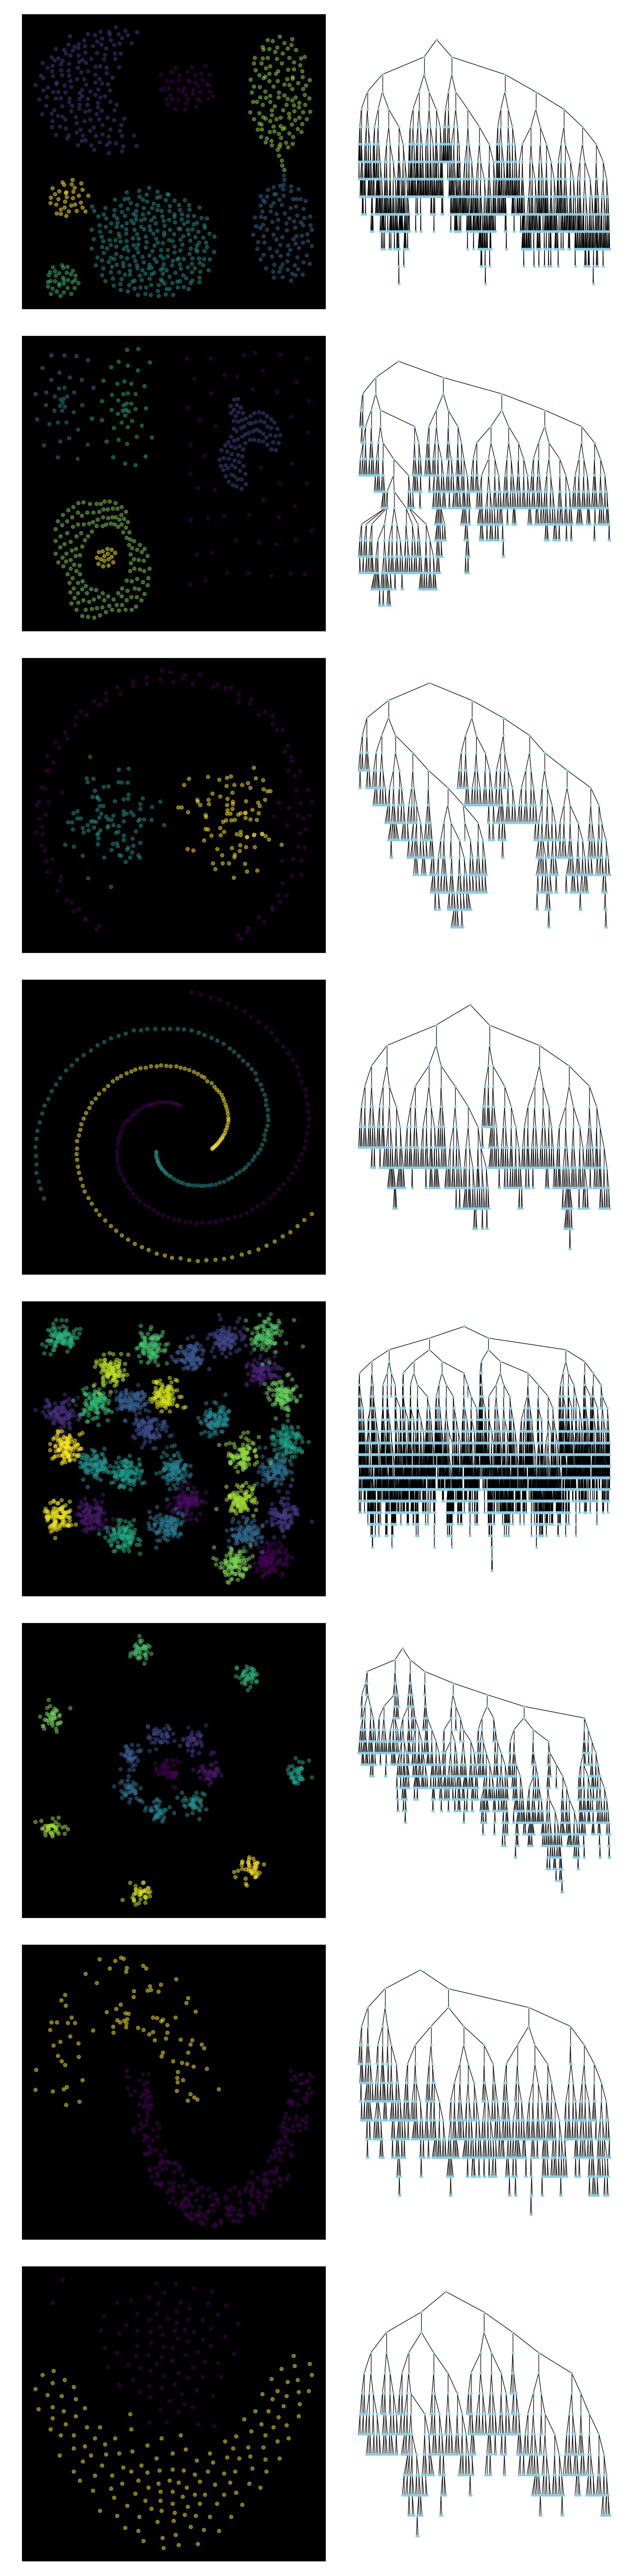

In [44]:
import networkx as nx

fig, axs = plt.subplots(8, 2, figsize=(15, 60))

for i in range(1, 9):
    # Scatter plot of the dataset with labels
    axs[i-1, 0].scatter(data_2D[i][0], data_2D[i][1], c=data_2D_labels[i], alpha=0.5)
    axs[i-1, 0].set_title(f'Dataset {i}')
    
    # Plot the tree structure
    padre = padres[i]
    G = nx.DiGraph()
    for idx, p in enumerate(padre):
        if p != -1:
            G.add_edge(p, idx)
        else:
            root = idx
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=10, node_color='skyblue', font_size=10, font_weight='bold', ax=axs[i-1, 1])
    axs[i-1, 1].set_title(f'Tree Structure {i}')

plt.tight_layout()
plt.show()

In [80]:
depths = {}
rev_padres = {}

for i in range(1, 9):
    rev_padre = [[] for _ in range(len(padres[i]))]
    for idx, p in enumerate(padres[i]):
        if p != -1:
            rev_padre[p].append(idx)
    
    rev_padres[i] = rev_padre
    depths[i] = {}        
    
    def calc_depths(u, G, depth):
        depths[i][u] = depth
        for child in G[u]:
            calc_depths(child, G, depth+1)
            
    calc_depths(len(padres[i])-1, rev_padre, 0)


In [127]:
def depth_to_color(depth, max_depth):
    n = (1.1)**(max_depth-depth)
    max_n = (1.1)**max_depth
    return (n/max_n, n/max_n, (1-n/max_n))

def depth_to_alpha(depth, max_depth):
    n = (1.01)**(max_depth-depth)
    max_n = (1.01)**max_depth
    return n/max_n

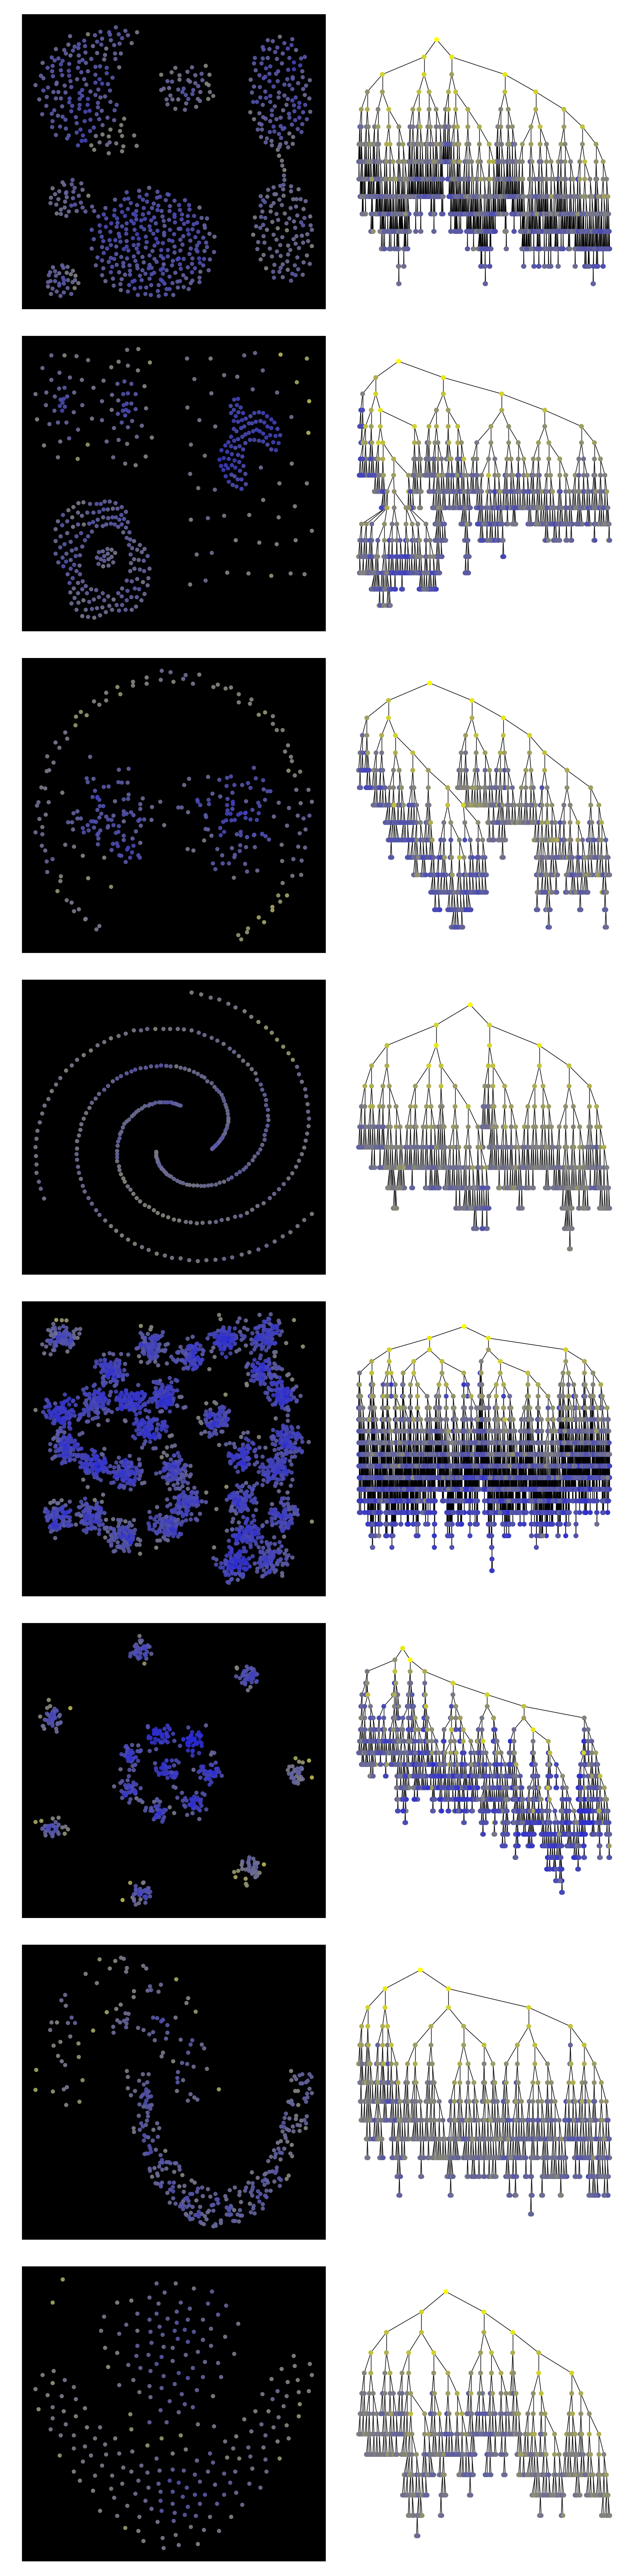

In [128]:

fig, axs = plt.subplots(8, 2, figsize=(15, 60))

for i in range(1, 9):
    
    node_colors = {}
    for n in range(len(depths[i])):
        node_colors[n] = depth_to_color(depths[i][n], max(depths[i].values()))
    
    point_colors = [node_colors[n] for n in range(len(data_2D[i]))]
    point_alphas = [depth_to_alpha(depths[i][n], max(depths[i].values())) for n in range(len(data_2D[i]))]
    
    axs[i-1, 0].scatter(data_2D[i][0], data_2D[i][1], c=point_colors, alpha=point_alphas)
    axs[i-1, 0].set_title(f'Dataset {i}')
    
    padre = padres[i]
    G = nx.DiGraph()
    for idx, p in enumerate(padre):
        if p != -1:
            G.add_edge(p, idx)
        else:
            root = idx
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
    
    node_colors = [depth_to_color(depths[i][n], max(depths[i].values())) for n in range(len(depths[i]))]
    
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=50, node_color=node_colors, font_size=20, font_weight='bold', ax=axs[i-1, 1], labels=depths[i])
    axs[i-1, 1].set_title(f'Tree Structure {i}')

plt.tight_layout()
plt.show()